In [1]:
!pip install yfinance
!pip install tensorflow

  Using cached tensorflow-2.16.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.3.2-cp312-cp312-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp37-abi3-macosx_10_9_universal2.whl.metadata (541 bytes)
  Using cached setuptools-70.0.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached typing_extensio

In [3]:
import yfinance as yf
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

[*********************100%%**********************]  1 of 1 completed


Matplotlib is building the font cache; this may take a moment.
[*********************100%%**********************]  1 of 1 completed

Predicted Close Price on 21st December 2023 for AAPL: 195.50410217285156


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-21,196.100006,197.080002,193.500000,194.679993,194.168518,46482500
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900
...,...,...,...,...,...,...
2024-04-15,175.360001,176.630005,172.500000,172.690002,172.456085,73531800
2024-04-16,171.750000,173.759995,168.270004,169.380005,169.150574,73711200
2024-04-17,169.610001,170.649994,168.000000,168.000000,167.772446,50901200


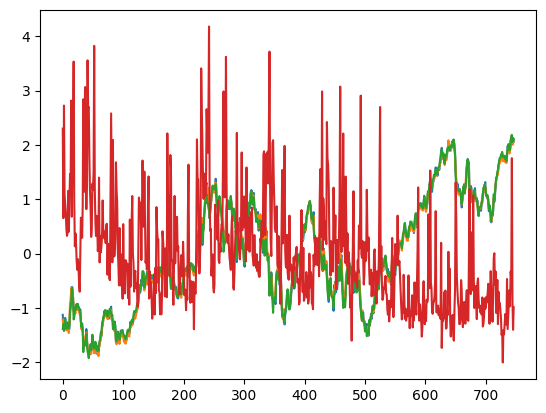

In [5]:
# Fetch historical stock data using Yahoo Finance API
stock_symbol_1 = "AAPL" # Replace with your desired stock symbol
stock_data = yf.download(stock_symbol_1, start="2021-01-01", end="2023-12-21") # over 600 days
# Feature engineering — assuming ‘Close’ is the target variable and other columns are features
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'
# Splitting the data into features and target variable
X = stock_data[features]
y = stock_data[target]

# Convert data to NumPy arrays for scaling
X_np = X.values
y_np = y.values

# Code Snippet: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_np)
import numpy as np
import matplotlib.pyplot as plt

plt.plot(X_scaled)

#Blue is Open, Orange is High, Green is Low, Red is Volume
# Code Snippet: Random Forest Model Creation and Training
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_scaled, y_np)
# Code Snippet: Making Predictions
last_data_point = X_np[-1].reshape(1, -1)
scaled_last_data_point = scaler.transform(last_data_point)
predicted_price = rf.predict(scaled_last_data_point)

print(f"Predicted Close Price on 21st December 2023 for {stock_symbol_1}: {predicted_price[0]}")
stock_test_data = yf.download(stock_symbol_1, start="2023-12-21", end="2024-4-21")
display(stock_test_data)
# Splitting the data into features and target variable
X_test= stock_test_data[features]
y_test= stock_test_data[target]



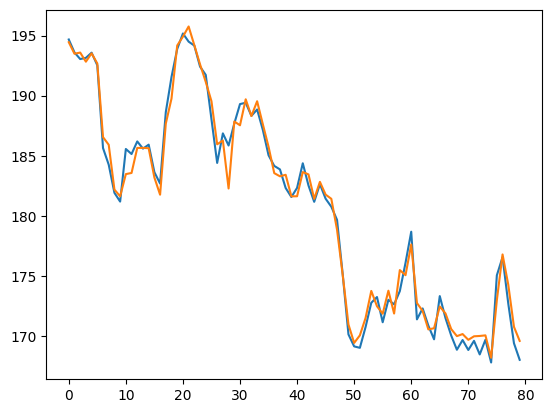

In [6]:
# Convert data to NumPy arrays for scaling
X_np_test = X_test.values
y_np_test = y_test.values

# Code Snippet: Feature Scaling
predicted_prices = []
actual_prices = y_np_test[:80]


for i in range(80):
    last_data_point = X_np_test[i].reshape(1, -1)
    scaled_last_data_point = scaler.transform(last_data_point)
    predicted_price = rf.predict(scaled_last_data_point)
    predicted_prices.append(predicted_price[0])
plt.plot(actual_prices)
plt.plot(predicted_prices)